Normal Equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 +3*X + np.random.rand(100,1)

In [2]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.44232816],
       [3.04898404]])

In [3]:

eta = 0.1
n_iterations = 1000
m = 100 

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.44232816],
       [3.04898404]])

In [4]:
X_new  = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] #add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.44232816],
       [10.54029624]])

(0.0, 2.0, 0.0, 15.0)

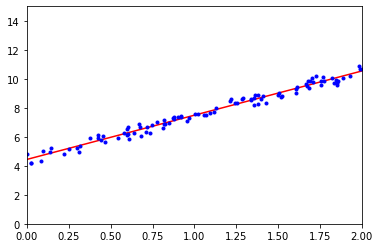

In [5]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y , "b.")
plt.axis([0,2,0,15])

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.44232816]), array([[3.04898404]]))

In [7]:
lin_reg.predict(X_new)

array([[ 4.44232816],
       [10.54029624]])

Gradient Descent step
θ next
step
= θ − η.∇θ.MSE(θ)

In [8]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients
theta 

array([[4.44232816],
       [3.04898404]])

# Stochastic Gradient Descent

In [9]:
n_epochs = 50
t0,t1 = 5,50 #learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2,1) #random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index +1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
theta

array([[4.43428778],
       [3.05268924]])

To perform Linear Regression using SGD with Scikit-Learn, you can use the SGDRe
gressor class, which defaults to optimizing the squared error cost function

In [11]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 50,penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [12]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.43577004]), array([3.06077311]))